In [27]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
f = 4
a = 5
index = np.array(range(100))
cos_list = a * np.cos(2* np.pi * f / len(index) * index )

In [30]:
rand_list = [random.uniform(-1,1) for i in range(100)]

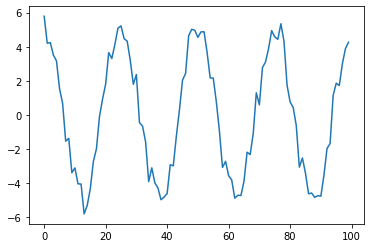

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(index, cos_list + rand_list)
plt.show()

In [32]:
import numpy, scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

Amplitude=0.9907973050415034, Angular freq.=1.9859282910317477, phase=0.5835566186574166, offset=4.013646946297192, Max. Cov.=0.012934511627838506


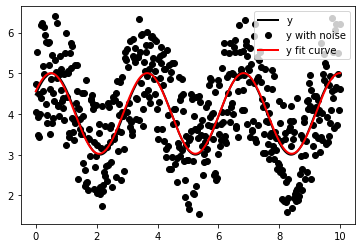

In [33]:
import pylab as plt

N, amp, omega, phase, offset, noise = 500, 1., 2., .5, 4., 3
#N, amp, omega, phase, offset, noise = 50, 1., .4, .5, 4., .2
#N, amp, omega, phase, offset, noise = 200, 1., 20, .5, 4., 1
tt = numpy.linspace(0, 10, N)
tt2 = numpy.linspace(0, 10, 10*N)
yy = amp*numpy.sin(omega*tt + phase) + offset
yynoise = yy + noise*(numpy.random.random(len(tt))-0.5)

res = fit_sin(tt, yynoise)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

plt.plot(tt, yy, "-k", label="y", linewidth=2)
plt.plot(tt, yynoise, "ok", label="y with noise")
plt.plot(tt2, res["fitfunc"](tt2), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()

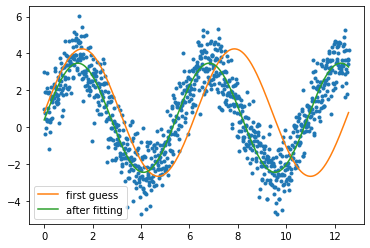

In [37]:
import numpy as np
from scipy.optimize import leastsq
import pylab as plt

N = 1000 # number of data points
t = np.linspace(0, 4*np.pi, N)
f = 1.15247 # Optional!! Advised not to use
data = 3.0*np.sin(f*t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

#fine_t = np.arange(0,max(t),0.1)
#data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(t, data_fit, label='after fitting')
plt.legend()
plt.show()

In [41]:
N = 1000 # number of data points
t = np.linspace(0, 4*np.pi, N)
f = 1.15247 # Optional!! Advised not to use
data = 3.0*np.sin(f*t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise

In [42]:
def my_fit(t, data, fine_t):

    guess_mean = np.mean(data)
    guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
    guess_phase = 0
    guess_freq = 1
    guess_amp = 1

    data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

    optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
    est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]
    return est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

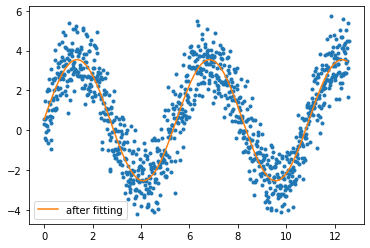

In [43]:
#fine_t = np.arange(0,max(t),0.1)
data_fit=my_fit(t, data, fine_t)

plt.plot(t, data, '.')
#plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

In [71]:
N = 1000 # number of data points
t1 = t[:200]
t2 = t[300:500]
t3 = t[650:1000]
shit_t = np.concatenate((t1, t2, t3), axis=None)
shit_data = 3.0*np.sin(f*shit_t+0.001) + 0.5 + np.random.randn(len(shit_t))

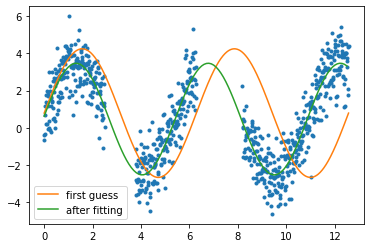

In [73]:
data_fit=my_fit(shit_t, shit_data, fine_t)

plt.plot(shit_t, shit_data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()